<a href="https://www.kaggle.com/code/subhajeetdas/heart-attack-prediction?scriptVersionId=126184691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Loading Data

In [3]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

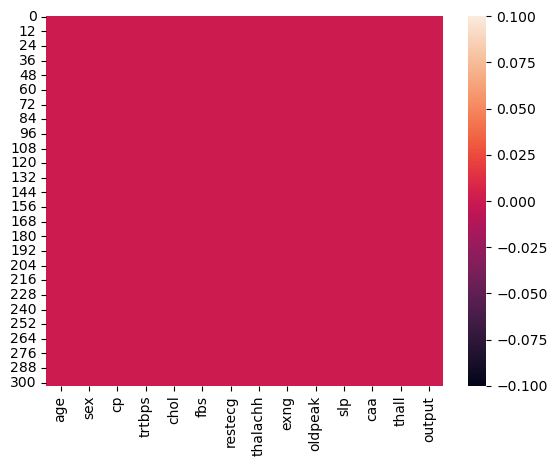

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
df.size

4242

In [9]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

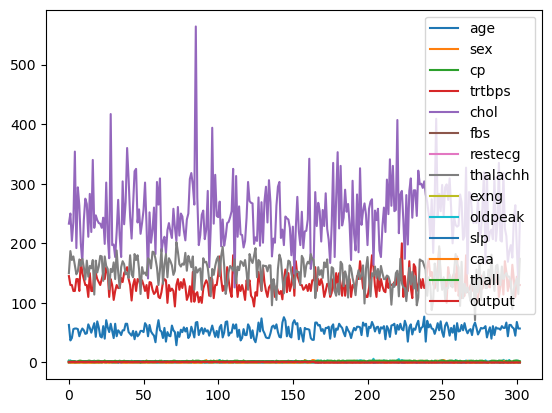

In [10]:
df.plot()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

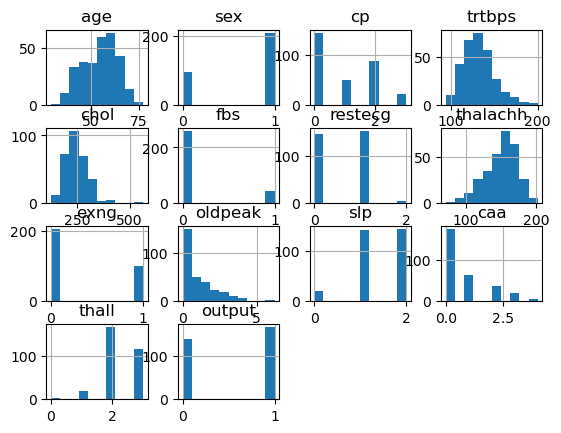

In [11]:
df.hist()

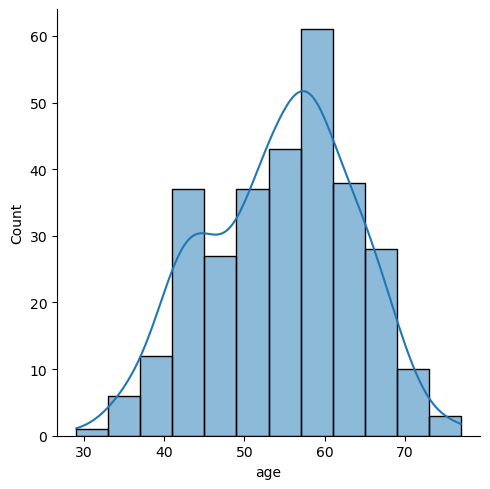

In [12]:
sns.displot(df['age'], kde=True)

<AxesSubplot:xlabel='output', ylabel='Density'>

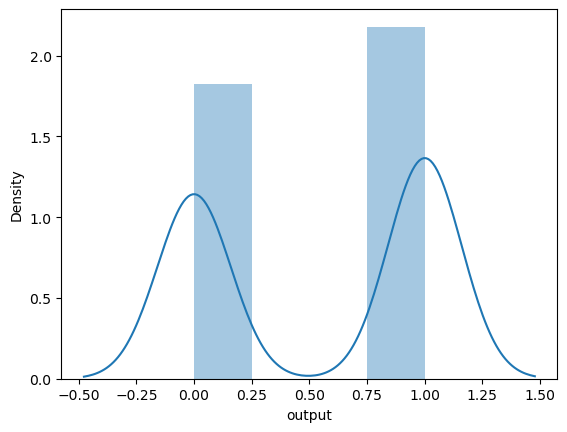

In [13]:
sns.distplot(df.output)

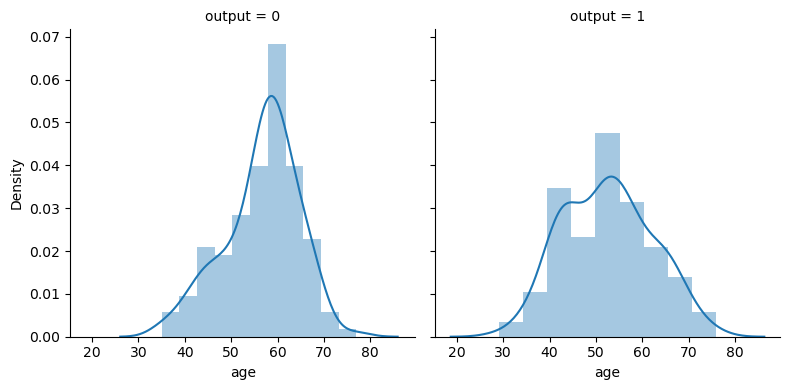

In [14]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "age")

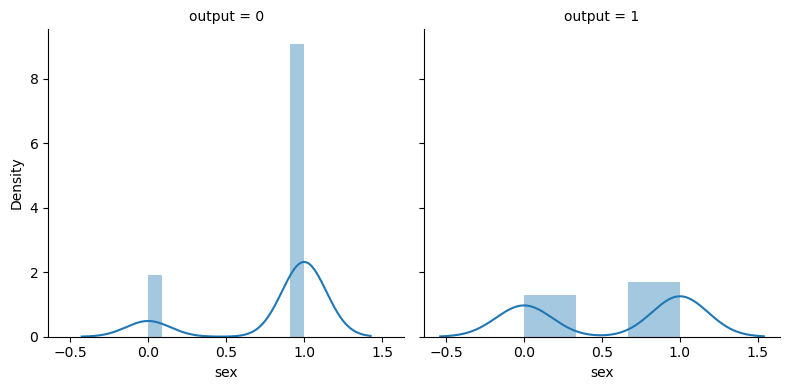

In [15]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "sex")

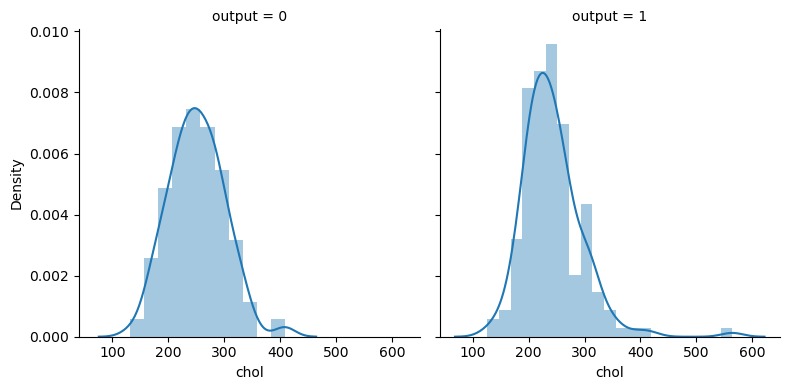

In [16]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "chol")

In [17]:
x = df.iloc[:, :13]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
x = x.values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [19]:
y = df.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [20]:
y = y.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Train & Test Splitting the Data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("ROC-AUC Score : ", roc_auc_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
    cm.plot()

# Gaussian Naive Bayes

In [23]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [24]:
y_pred_gnb = model_gnb.predict(x_test)

Precision :  0.7575757575757576
Recall :  0.8064516129032258
Accuracy :  0.7704918032786885
F1 Score :  0.7812499999999999
ROC-AUC Score :  0.7698924731182796

 [[22  8]
 [ 6 25]]




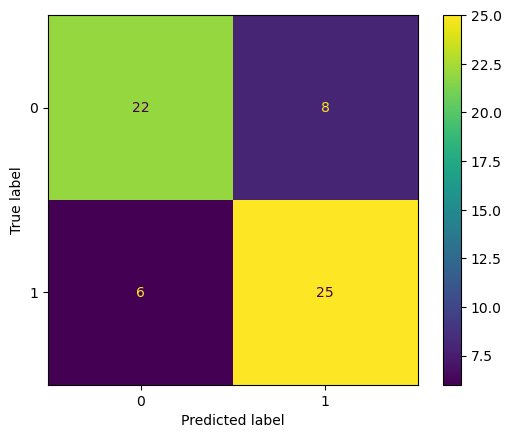

In [25]:
perform(y_pred_gnb)

In [26]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Save the Gaussian Naive Bayes model

In [27]:
filename = 'Heart_Attack_Prediction_GNB.h5'
pickle.dump(model_gnb, open(filename, 'wb'))

# Multinomial Naive Bayes

In [28]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [29]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  0.6875
Recall :  0.7096774193548387
Accuracy :  0.6885245901639344
F1 Score :  0.6984126984126984
ROC-AUC Score :  0.6881720430107527

 [[20 10]
 [ 9 22]]




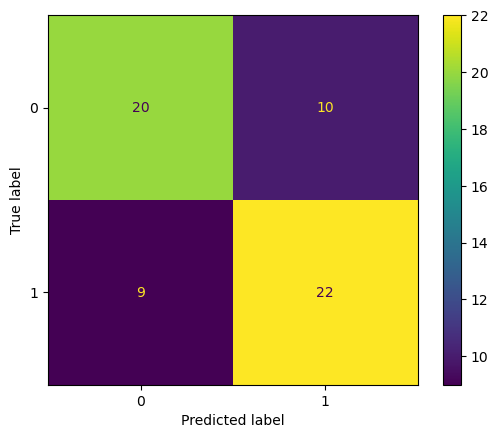

In [30]:
perform(y_pred_mnb)

In [31]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## Save the Multinomial Naive Bayes model

In [32]:
filename = 'Heart_Attack_Prediction_MNB.h5'
pickle.dump(model_mnb, open(filename, 'wb'))

# Bernoulli Naive Bayes

In [33]:
model_bnb = BernoulliNB()
model_bnb.fit(x_train, y_train)

BernoulliNB()

In [34]:
y_pred_bnb = model_bnb.predict(x_test)

Precision :  0.6666666666666666
Recall :  0.7741935483870968
Accuracy :  0.6885245901639344
F1 Score :  0.7164179104477612
ROC-AUC Score :  0.6870967741935483

 [[18 12]
 [ 7 24]]




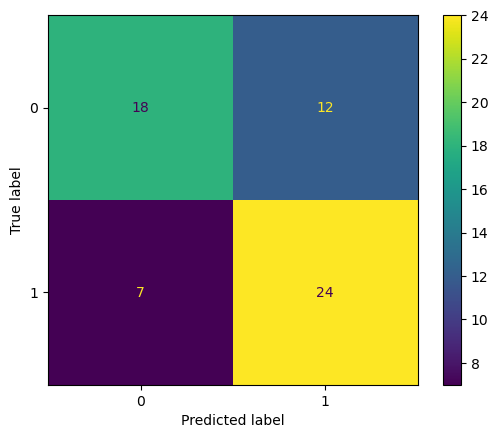

In [35]:
perform(y_pred_bnb)

In [36]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.67      0.77      0.72        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## Save the Bernoulli Naive Bayes model

In [37]:
filename = 'Heart_Attack_Prediction_BNB.h5'
pickle.dump(model_bnb, open(filename, 'wb'))

# Logistic Regreasion

In [38]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.7297297297297297
Recall :  0.8709677419354839
Accuracy :  0.7704918032786885
F1 Score :  0.7941176470588235
ROC-AUC Score :  0.7688172043010754

 [[20 10]
 [ 4 27]]




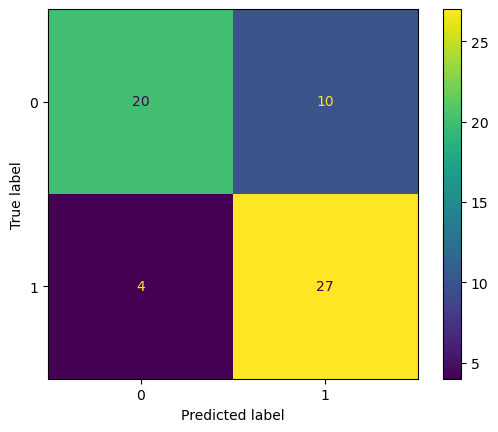

In [40]:
perform(y_pred_lr)

In [41]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



## Save the Logistic Regression model

In [42]:
filename = 'Heart_Attack_Prediction_LR.h5'
pickle.dump(model_lr, open(filename, 'wb'))

# XGBoost Classifier

In [43]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.75
Recall :  0.8709677419354839
Accuracy :  0.7868852459016393
F1 Score :  0.8059701492537312
ROC-AUC Score :  0.7854838709677419

 [[21  9]
 [ 4 27]]




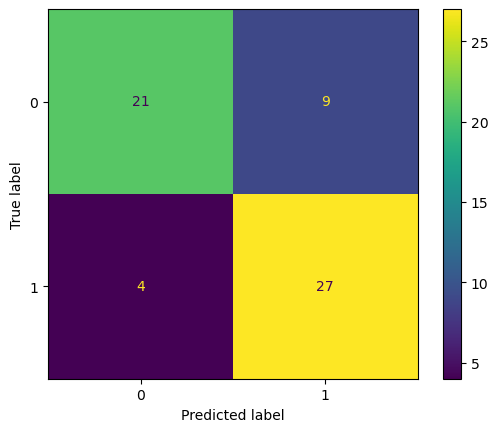

In [45]:
perform(y_pred_xgb)

In [46]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



## Save the XGBoost Classifier model

In [47]:
filename = 'Heart_Attack_Prediction_XGB.h5'
pickle.dump(model_xgb, open(filename, 'wb'))

# Decision Tree

In [48]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.696969696969697
Recall :  0.7419354838709677
Accuracy :  0.7049180327868853
F1 Score :  0.71875
ROC-AUC Score :  0.7043010752688172

 [[20 10]
 [ 8 23]]




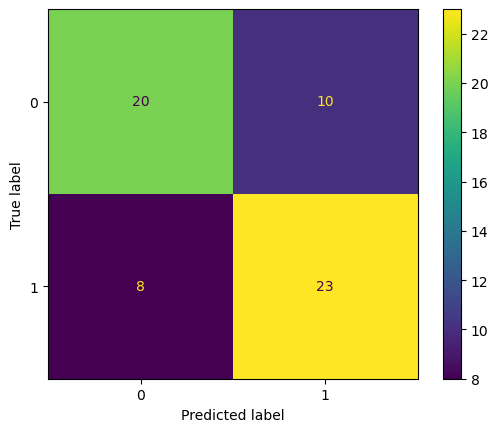

In [50]:
perform(y_pred_dt)

In [51]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.70      0.74      0.72        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



## Save the Decision Tree model

In [52]:
filename = 'Heart_Attack_Prediction_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))

## Decision Tree Visualization

In [53]:
feature_names = df.columns[0:13]
viz = df.copy()
viz["output"]=viz["output"].values.astype(str)
print(viz.dtypes)
target_names = viz['output'].unique().tolist()

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output       object
dtype: object


In [54]:
target_names

['1', '0']

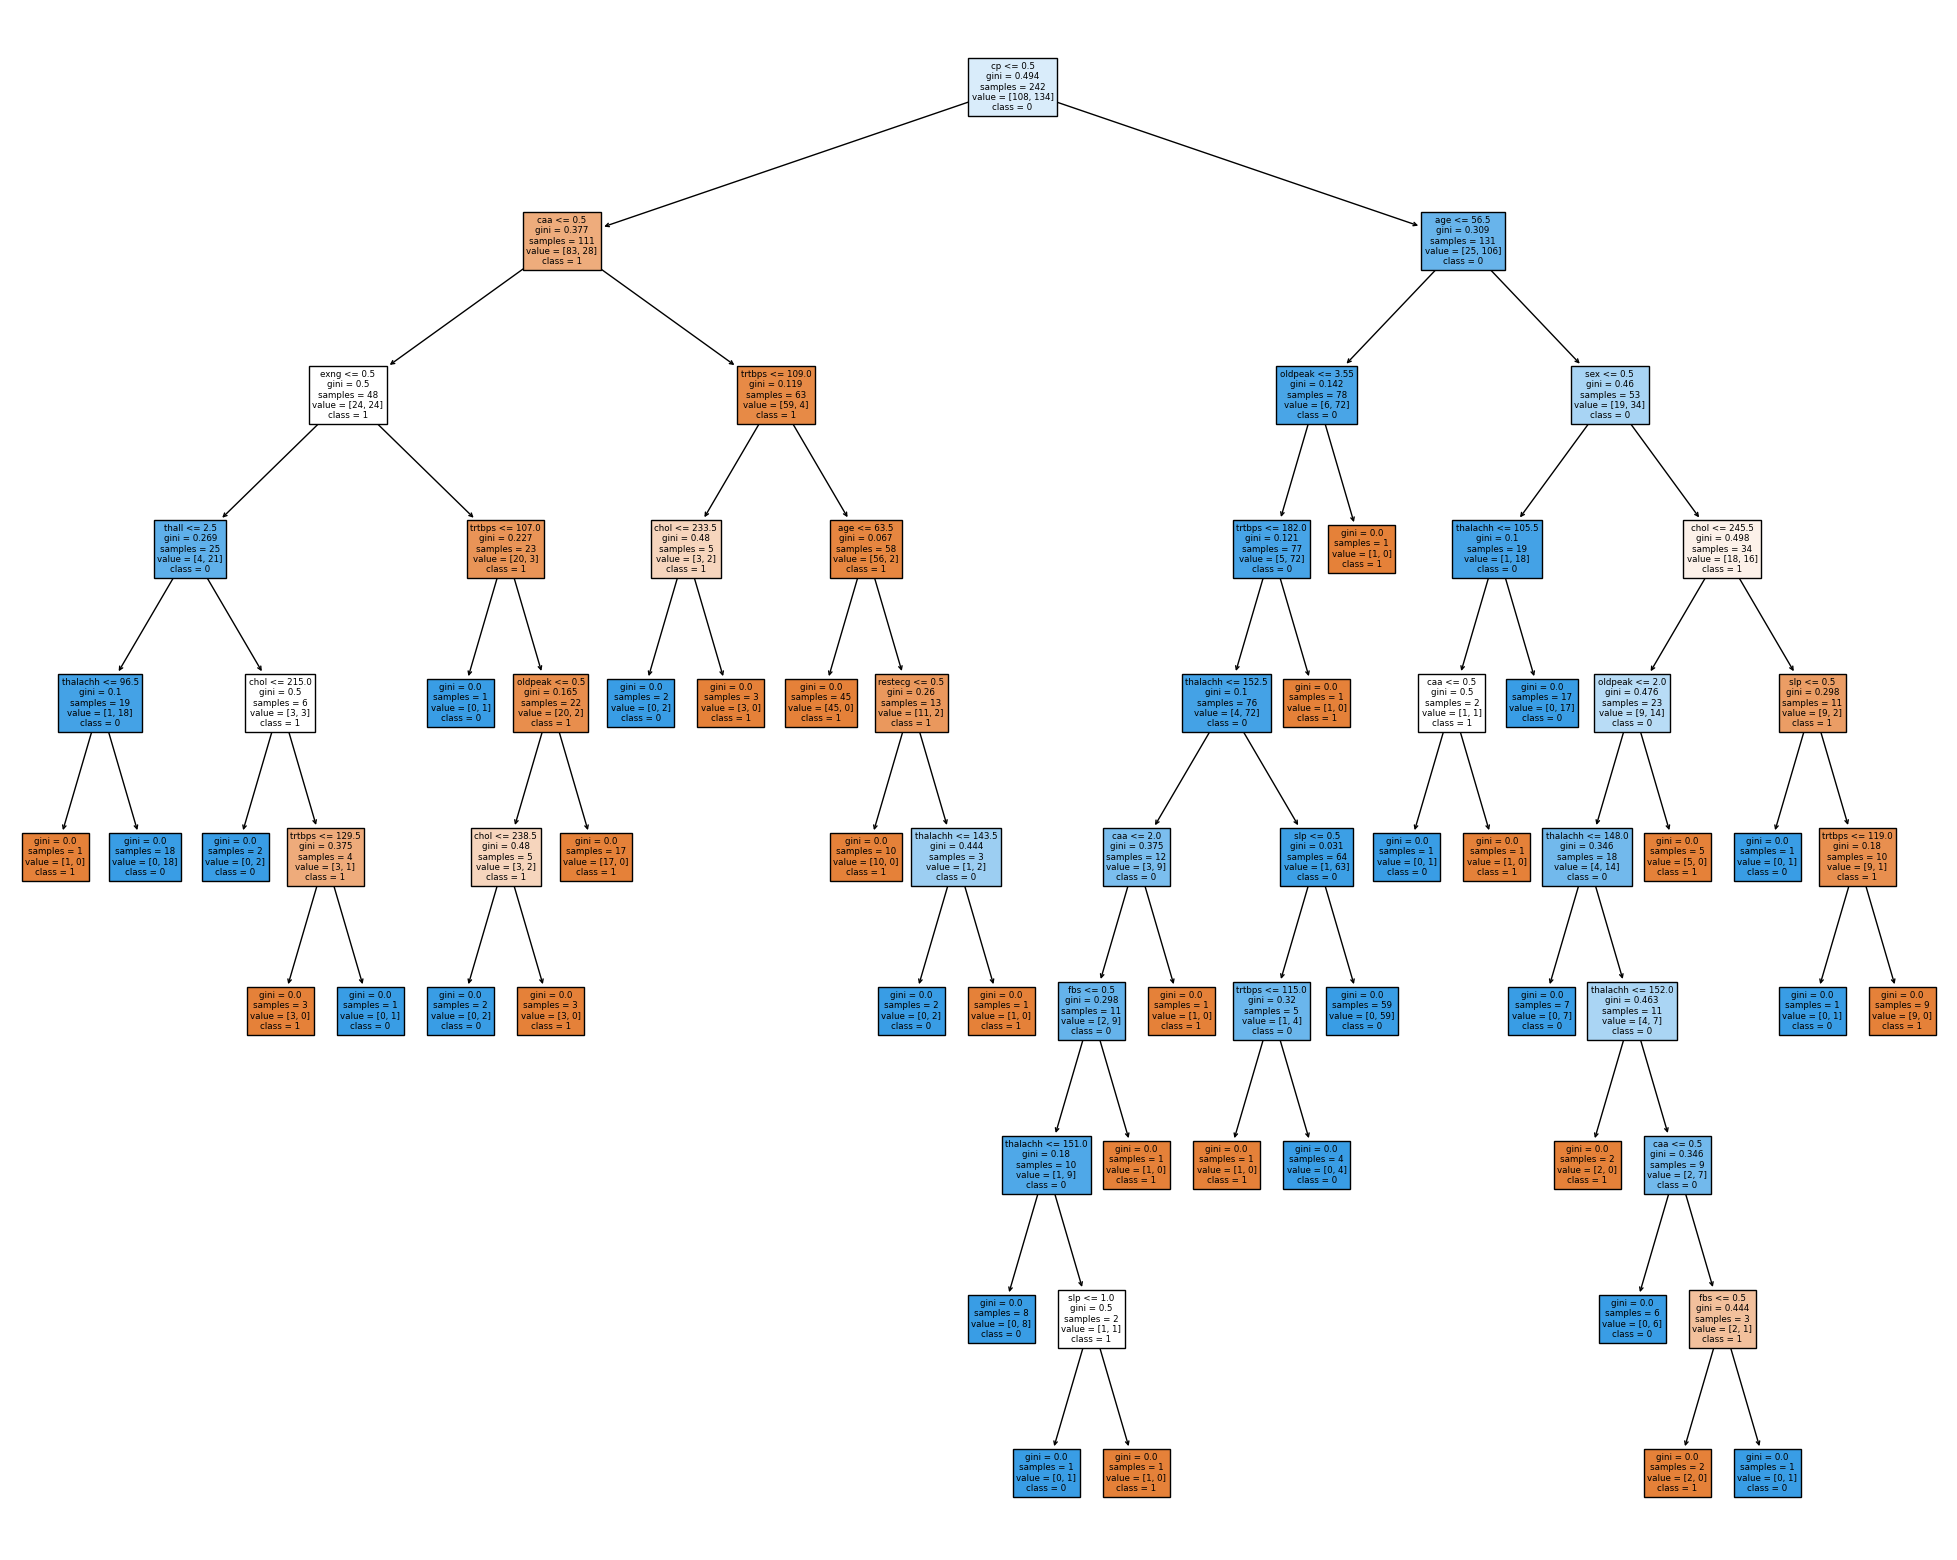

In [55]:
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

In [56]:
viz_model = dtreeviz.model(model_dt,
                           X_train=x_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Heart Attack Chances',
                           class_names=['High', 'Low'])

v = viz_model.view()     # render as SVG into internal object
v.save("Heart Attack Chances.svg")  # save as svg

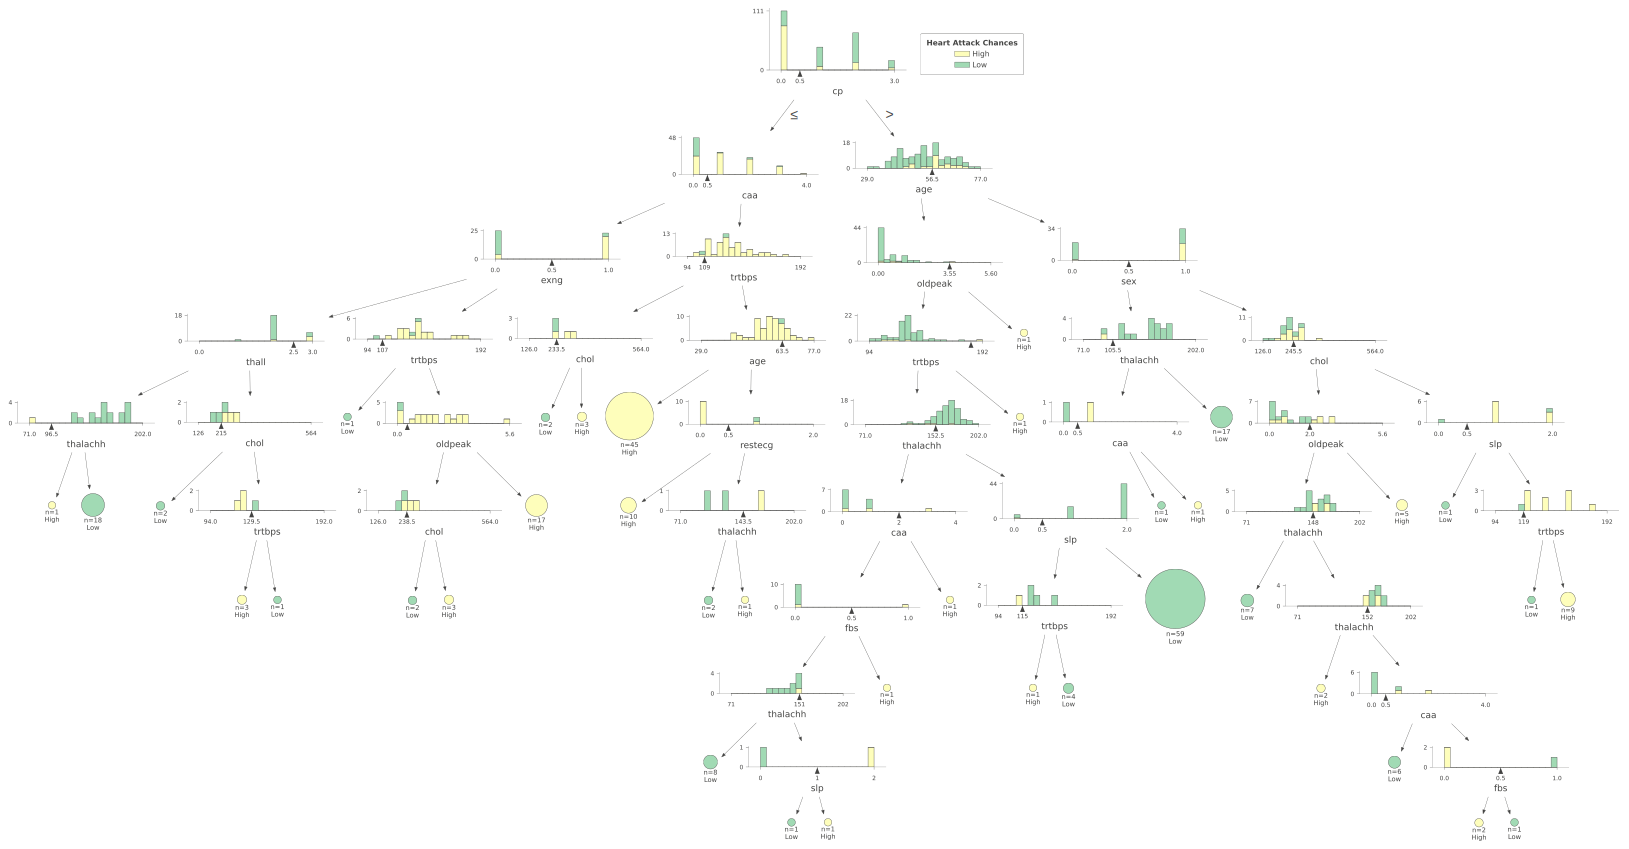

In [57]:
viz_model.view()

# Random Forest

In [58]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.75
Recall :  0.8709677419354839
Accuracy :  0.7868852459016393
F1 Score :  0.8059701492537312
ROC-AUC Score :  0.7854838709677419

 [[21  9]
 [ 4 27]]




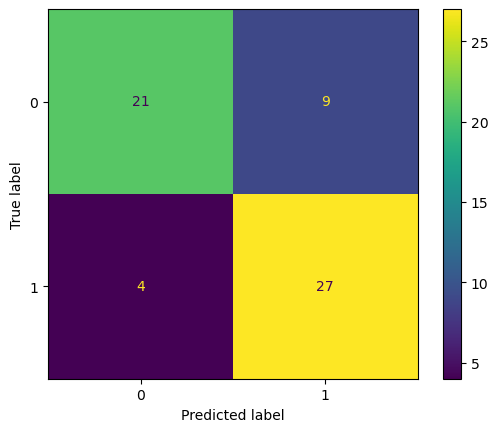

In [60]:
perform(y_pred_rf)

In [61]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



## Save the Random Forest model

In [62]:
filename = 'Heart_Attack_Prediction_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))

# K-Nearest Neighbors

In [63]:
iteration = 25

In [64]:
error_rate = []
acc = []
scores = {}

for i in range(1,iteration):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
    scores[i] = accuracy_score(y_test, y_pred_knn)
    acc.append(accuracy_score(y_test, y_pred_knn))

scores

{1: 0.4918032786885246,
 2: 0.4918032786885246,
 3: 0.5737704918032787,
 4: 0.5409836065573771,
 5: 0.5737704918032787,
 6: 0.5737704918032787,
 7: 0.5737704918032787,
 8: 0.5901639344262295,
 9: 0.5901639344262295,
 10: 0.5737704918032787,
 11: 0.5737704918032787,
 12: 0.5737704918032787,
 13: 0.5737704918032787,
 14: 0.5737704918032787,
 15: 0.6229508196721312,
 16: 0.6229508196721312,
 17: 0.6065573770491803,
 18: 0.639344262295082,
 19: 0.6065573770491803,
 20: 0.6229508196721312,
 21: 0.6065573770491803,
 22: 0.639344262295082,
 23: 0.6065573770491803,
 24: 0.6557377049180327}

Minimum error:- 0.3442622950819672 at K = 23


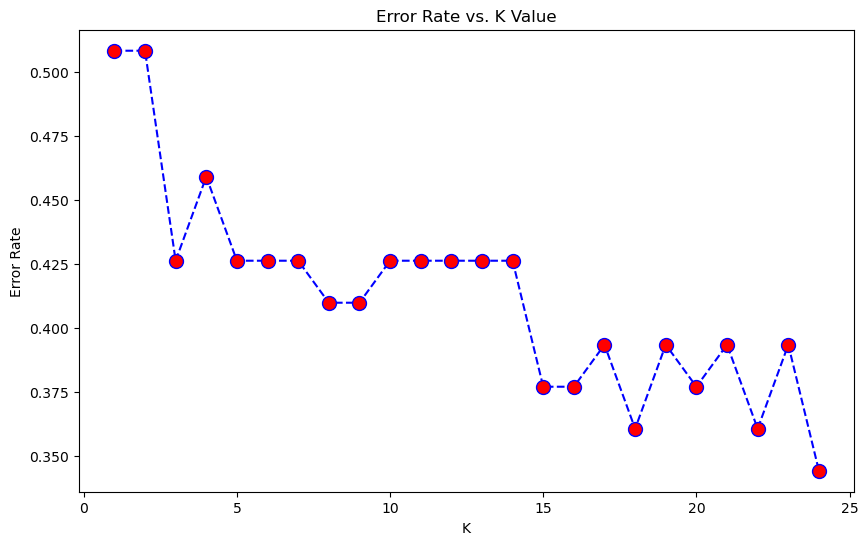

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.6557377049180327 at K = 23


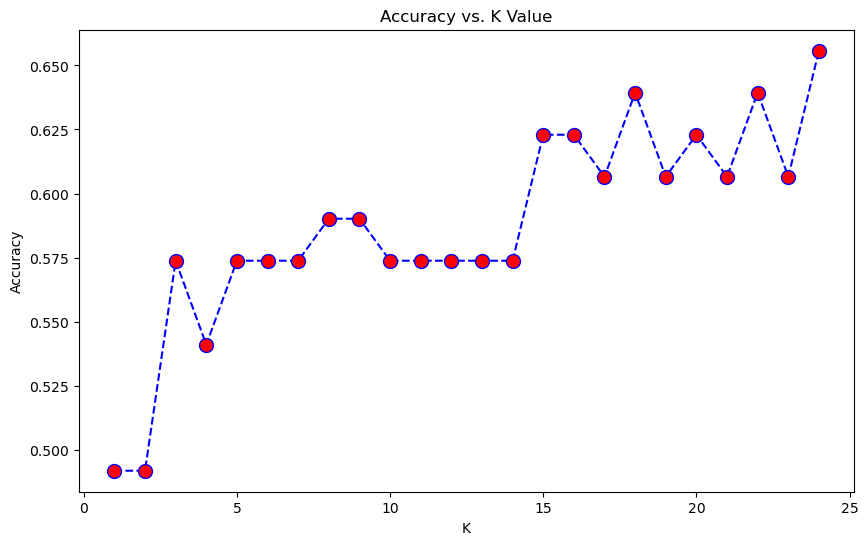

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration),acc,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [67]:
model_knn = KNeighborsClassifier(n_neighbors = 23)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [68]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.5897435897435898
Recall :  0.7419354838709677
Accuracy :  0.6065573770491803
F1 Score :  0.6571428571428573
ROC-AUC Score :  0.6043010752688172

 [[14 16]
 [ 8 23]]




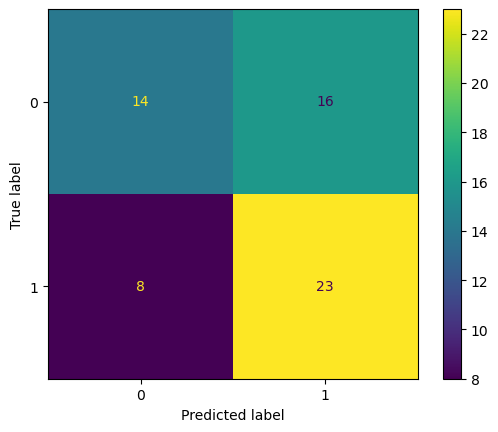

In [69]:
perform(y_pred_knn)

In [70]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54        30
           1       0.59      0.74      0.66        31

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



## Save the KNN model

In [71]:
filename = 'Heart_Attack_Prediction_KNN.h5'
pickle.dump(model_knn, open(filename, 'wb'))

# Support Vector Classifier with Linear Kernel

In [72]:
model_svc = SVC(kernel='linear')
model_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [73]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.7142857142857143
Recall :  0.8064516129032258
Accuracy :  0.7377049180327869
F1 Score :  0.7575757575757576
ROC-AUC Score :  0.7365591397849462

 [[20 10]
 [ 6 25]]




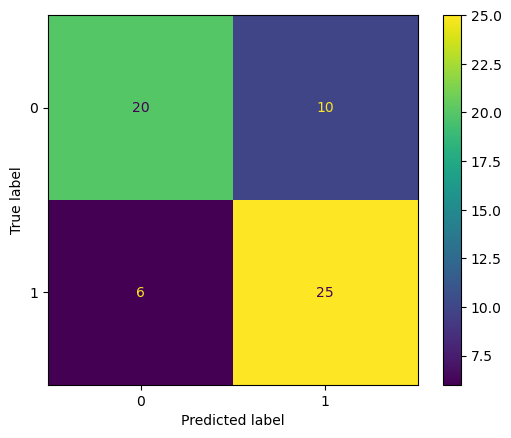

In [74]:
perform(y_pred_svc)

In [75]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## Save the SVC model

In [76]:
filename = 'Heart_Attack_Prediction_SVC.h5'
pickle.dump(model_svc, open(filename, 'wb'))

# Nu-Support Vector Classifier

In [77]:
model_nsvc = NuSVC()
model_nsvc.fit(x_train, y_train)

NuSVC()

In [78]:
y_pred_nsvc = model_nsvc.predict(x_test)

Precision :  0.7368421052631579
Recall :  0.9032258064516129
Accuracy :  0.7868852459016393
F1 Score :  0.8115942028985507
ROC-AUC Score :  0.7849462365591399

 [[20 10]
 [ 3 28]]




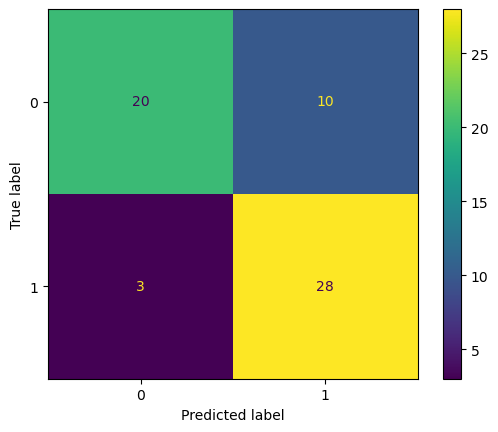

In [79]:
perform(y_pred_nsvc)

In [80]:
print(classification_report(y_test, y_pred_nsvc))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



## Save the NuSVC model

In [81]:
filename = 'Heart_Attack_Prediction_NuSVC.h5'
pickle.dump(model_nsvc, open(filename, 'wb'))

# Precision-Recall Curve

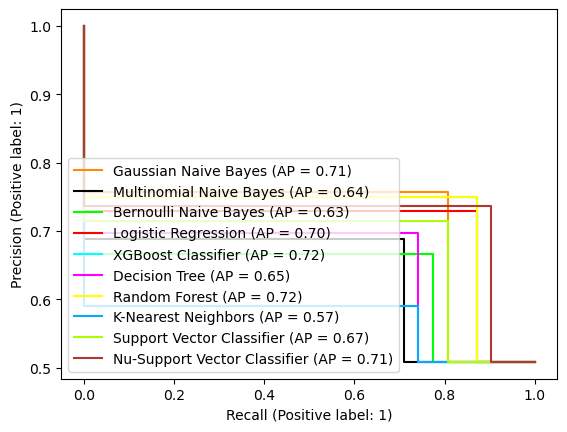

In [82]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, ax=ax, name=f"Gaussian Naive Bayes", color="darkorange")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost Classifier", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="magenta", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="yellow", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, name=f"K-Nearest Neighbors", color="#05AAFC", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name=f"Support Vector Classifier", color="#AEFE01", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nsvc, name=f"Nu-Support Vector Classifier", color="#B03A2E", ax=ax)

# ROC Curve

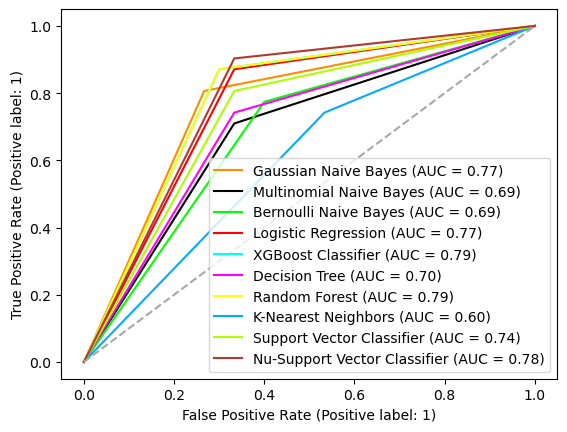

In [83]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, ax=ax, name=f"Gaussian Naive Bayes", color="darkorange")
RocCurveDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="lime", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="red", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost Classifier", color="cyan", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="magenta", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="yellow", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name=f"K-Nearest Neighbors", color="#05AAFC", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name=f"Support Vector Classifier", color="#AEFE01", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_nsvc, name=f"Nu-Support Vector Classifier", color="#B03A2E", ax=ax)
plt.plot([0,1], [0,1], color="#A8A8A8", linestyle="--")